# [Deep Learning](https://github.com/M-Sc-AUT/M.Sc-Computer-Architecture/tree/main/Deep%20Learning) - Spring 2024
#### [Reza Adinepour](https://github.com/rezaAdinepour)
#### Stu.ID: 402131055

## Question 2 Part A:
We should load dataset ($\texttt{dataset\_1.csv}$ file) as a train dataset

### Import libraries

In [10]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

### Check GPU availability

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### Read dataset and data visualization

In [12]:
df = pd.read_csv("../inputs/dataset_1.csv")

# shuffling dataset
df = shuffle(df)

# split dataset into the inputs x and the outputs y (labels)
X = df[['x', 'y']]
y = df['label']

print("shape of data frame is:", df.shape)
df

shape of data frame is: (100000, 3)


,x,y,label
61435,90.41064,13.48239,0.0
29507,-52.44656,-83.14557,1.0
40887,88.12751,-18.36648,0.0
86611,-46.61377,95.27467,0.0
54742,-76.49591,-58.61427,1.0
...,...,...,...
13980,-49.56074,91.76544,0.0
68294,78.28445,-74.21827,1.0
94540,-64.14317,86.52694,0.0
14330,-22.94606,-21.12930,0.0


### Convert data to pytorch tensors

In [13]:
X_tensor = torch.tensor(X.values, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y.values, dtype=torch.float32).to(device).view(-1, 1)

print("Training set size:", len(X_tensor))
X_tensor

Training set size: 100000


tensor([[ 90.4106,  13.4824],
        [-52.4466, -83.1456],
        [ 88.1275, -18.3665],
        ...,
        [-64.1432,  86.5269],
        [-22.9461, -21.1293],
        [-73.3481, -61.6664]], device='cuda:0')

### Split classes

In [14]:
class0 = X_tensor[y_tensor.flatten() == 0]
class1 = X_tensor[y_tensor.flatten() == 1]

### Plot dataset

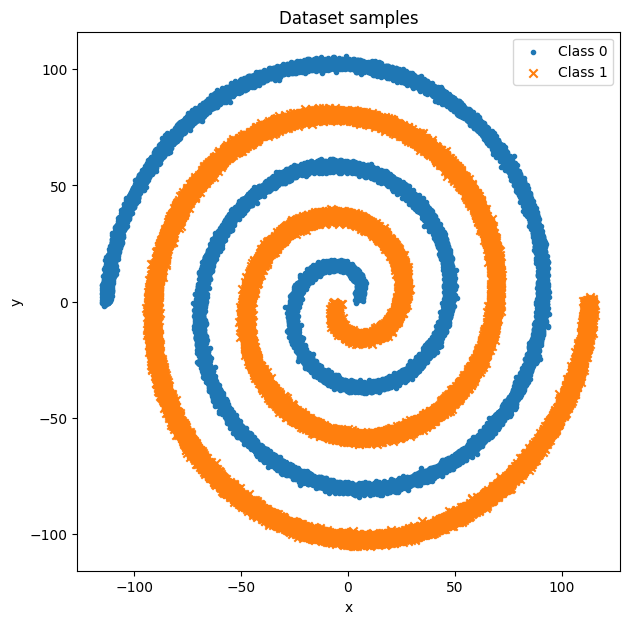

In [18]:
plt.figure(figsize=(7, 7))

plt.scatter(class0[:, 0].cpu().numpy(), class0[:, 1].cpu().numpy(), label="Class 0", marker='.')
plt.scatter(class1[:, 0].cpu().numpy(), class1[:, 1].cpu().numpy(), label="Class 1", marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Dataset samples")
plt.legend()

plt.show()

### Split dataset into the 50 subsets

In [24]:
# Determine the number of samples per subset
num_subsets = 50
num_samples_per_class = min(len(class0), len(class1)) // num_subsets

subsets = []
for _ in range(num_subsets):
    indices_class0 = torch.randperm(len(class0))[:num_samples_per_class]
    indices_class1 = torch.randperm(len(class1))[:num_samples_per_class]
    
    subset_class0 = class0[indices_class0]
    subset_class1 = class1[indices_class1]
    
    subset = torch.cat((subset_class0, subset_class1), dim=0)
    subsets.append(subset)

for i, subset in enumerate(subsets):
    print(f"subset {i+1}: {subset.shape}")

subset 1: torch.Size([2000, 2])
subset 2: torch.Size([2000, 2])
subset 3: torch.Size([2000, 2])
subset 4: torch.Size([2000, 2])
subset 5: torch.Size([2000, 2])
subset 6: torch.Size([2000, 2])
subset 7: torch.Size([2000, 2])
subset 8: torch.Size([2000, 2])
subset 9: torch.Size([2000, 2])
subset 10: torch.Size([2000, 2])
subset 11: torch.Size([2000, 2])
subset 12: torch.Size([2000, 2])
subset 13: torch.Size([2000, 2])
subset 14: torch.Size([2000, 2])
subset 15: torch.Size([2000, 2])
subset 16: torch.Size([2000, 2])
subset 17: torch.Size([2000, 2])
subset 18: torch.Size([2000, 2])
subset 19: torch.Size([2000, 2])
subset 20: torch.Size([2000, 2])
subset 21: torch.Size([2000, 2])
subset 22: torch.Size([2000, 2])
subset 23: torch.Size([2000, 2])
subset 24: torch.Size([2000, 2])
subset 25: torch.Size([2000, 2])
subset 26: torch.Size([2000, 2])
subset 27: torch.Size([2000, 2])
subset 28: torch.Size([2000, 2])
subset 29: torch.Size([2000, 2])
subset 30: torch.Size([2000, 2])
subset 31: torch.Si

In [26]:
for i, loader in enumerate(subsets):
    print(f"Subset {i+1}:")
    print(loader)
    print('-' * 50)

Subset 1:
tensor([[-36.0663,  50.1007],
        [  5.4376, -82.6796],
        [-42.9486, -61.9995],
        ...,
        [-31.2375, -41.8793],
        [ 50.9503,  54.6221],
        [ 68.8822,   4.2622]], device='cuda:0')
--------------------------------------------------
Subset 2:
tensor([[  78.6302,  -40.9821],
        [ -12.9601,  101.5806],
        [ -99.2876,   49.0515],
        ...,
        [  21.7964, -100.2938],
        [  30.6968,  -52.5568],
        [  44.9709,  -94.7409]], device='cuda:0')
--------------------------------------------------
Subset 3:
tensor([[ 17.9842,  53.8043],
        [ 35.8005,  37.4477],
        [ 47.0005,   7.6494],
        ...,
        [-16.9865, -97.5025],
        [ -7.0988,  81.4847],
        [ 66.7220,  27.6864]], device='cuda:0')
--------------------------------------------------
Subset 4:
tensor([[ 48.5439,   3.3203],
        [ 31.9371, -76.4278],
        [ 24.7361,  48.3563],
        ...,
        [ 22.5976,  20.2358],
        [-11.8244, -99.0908],

### Design MLP network

In [36]:
# class MLP(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(MLP, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.fc2 = nn.Linear(hidden_size, hidden_size)
#         self.fc3 = nn.Linear(hidden_size, output_size)
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x


# # Define the MLP network
# class MLP(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(MLP, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.fc2 = nn.Linear(hidden_size, hidden_size)
#         self.fc3 = nn.Linear(hidden_size, output_size)
#         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = self.relu(self.fc1(x))
#         x = self.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x




class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [37]:
num_networks = 5

# Create 50 instances of the network with different initializations
networks = [MLP().to(device) for _ in range(num_networks)]

# Display the structure of the first network for verification
networks

[MLP(
   (fc1): Linear(in_features=2, out_features=128, bias=True)
   (fc2): Linear(in_features=128, out_features=64, bias=True)
   (fc3): Linear(in_features=64, out_features=1, bias=True)
   (relu): ReLU()
 ),
 MLP(
   (fc1): Linear(in_features=2, out_features=128, bias=True)
   (fc2): Linear(in_features=128, out_features=64, bias=True)
   (fc3): Linear(in_features=64, out_features=1, bias=True)
   (relu): ReLU()
 ),
 MLP(
   (fc1): Linear(in_features=2, out_features=128, bias=True)
   (fc2): Linear(in_features=128, out_features=64, bias=True)
   (fc3): Linear(in_features=64, out_features=1, bias=True)
   (relu): ReLU()
 ),
 MLP(
   (fc1): Linear(in_features=2, out_features=128, bias=True)
   (fc2): Linear(in_features=128, out_features=64, bias=True)
   (fc3): Linear(in_features=64, out_features=1, bias=True)
   (relu): ReLU()
 ),
 MLP(
   (fc1): Linear(in_features=2, out_features=128, bias=True)
   (fc2): Linear(in_features=128, out_features=64, bias=True)
   (fc3): Linear(in_feature

### Utility functions for create network

In [142]:
# function to create a new MLP with different initialization
def create_mlp(input_size, hidden_size, output_size):
    model = MLP(input_size, hidden_size, output_size)
    model.apply(init_weights)
    return model

# function to initialize weights
def init_weights(m):
    if(isinstance(m, nn.Linear)):
        torch.nn.init.kaiming_uniform_(m.weight)
        m.bias.data.fill_(0.01)

### Set parameters of network

In [147]:
input_size = 2
hidden_size = 64
output_size = 1

num_networks = 5
mlp_networks = [create_mlp(input_size, hidden_size, output_size) for _ in range(num_networks)]

# different initializations
for i, net in enumerate(mlp_networks):
    print(f"Network {i+1}:")
    for name, param in net.named_parameters():
        if(param.requires_grad):
            print(name, param.data)
    print('-' * 50)

Network 1:
fc1.weight tensor([[-0.3550,  0.1449],
        [-0.0221, -0.8971],
        [-1.2359,  1.2547],
        [-0.1972, -0.0546],
        [-0.5432,  1.7020],
        [ 1.2092,  0.5014],
        [-0.0542, -1.0221],
        [-0.2690,  1.0734],
        [-0.3875, -1.3065],
        [-1.5529,  0.9907],
        [ 0.2117,  0.5285],
        [-0.3827,  0.7280],
        [ 0.8067, -1.5016],
        [-1.7084,  0.1777],
        [-1.0749,  1.1496],
        [ 1.0488, -1.0166],
        [-0.1416, -1.4611],
        [-1.1535,  0.3572],
        [-0.1866,  0.6260],
        [-1.1449, -1.5915],
        [ 1.5717, -1.2225],
        [ 0.5812,  0.5954],
        [-0.5876, -0.2626],
        [-1.5128,  0.8742],
        [-1.1454,  1.4909],
        [-1.1759,  0.1496],
        [ 1.1734,  1.3288],
        [-0.3960,  0.7553],
        [ 0.5046, -1.5490],
        [-1.3503, -0.3259],
        [-0.9914, -0.5838],
        [-1.2297,  0.6052],
        [-0.9062,  0.3474],
        [-0.4831, -0.7639],
        [-1.1671,  0.5577]

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Load the dataset
file_path = '../inputs/dataset_1.csv'
dataset = pd.read_csv(file_path)

# Display the dataset
dataset.head(), dataset.shape



# Number of subsets
num_subsets = 50

# Stratified splitting function
def stratified_split(data, num_splits):
    subsets = []
    for _ in range(num_splits):
        stratified_sample, _ = train_test_split(data, test_size=(1 - 1/num_splits), stratify=data['label'])
        subsets.append(stratified_sample)
    return subsets

# Perform stratified split
subsets = stratified_split(dataset, num_subsets)

# Verify the first subset
subsets[0].head(), len(subsets)

(              x         y  label
 96692 -46.95430  43.62381    0.0
 89828 -25.92502 -10.68615    0.0
 20467 -45.18129 -26.79268    1.0
 29300 -15.35711  55.67313    0.0
 17016 -10.46775  36.44978    1.0,
 50)

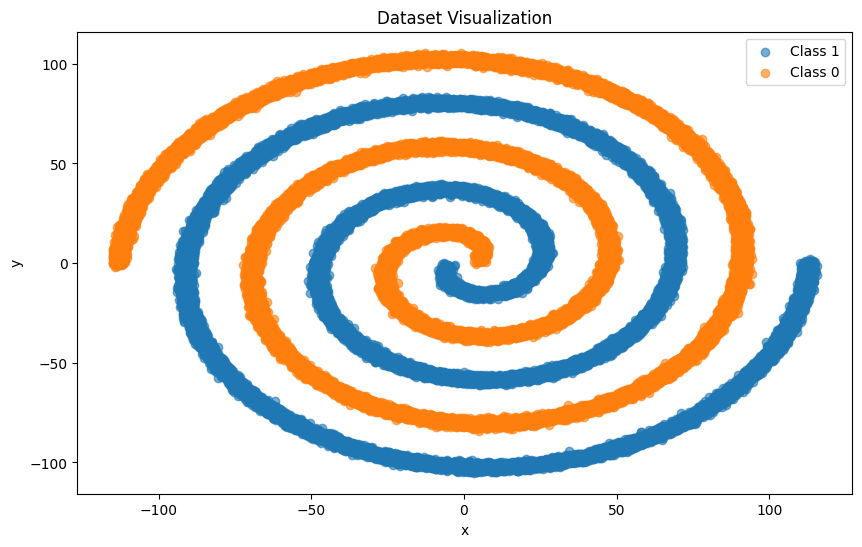

(tensor([[-91.7902,  61.2319,   0.0000],
         [-12.5324,  59.3856,   0.0000],
         [ 48.5701,  60.7165,   1.0000],
         [ 21.2425, -31.8728,   0.0000],
         [-69.7764,  -4.4921,   0.0000]], device='cuda:0'),
 50)